In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation, cosine
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
users = pd.read_csv('yelp_user\\yelp_user.csv')

In [3]:
users.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


In [4]:
users.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'useful',
       'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [5]:
good_users = users[users['review_count']>100]

In [6]:
good_users = good_users[good_users['useful']>1]

In [7]:
good_users.shape

(58122, 22)

In [8]:
good_users.head()
good_users.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'useful',
       'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [9]:
good_users = good_users.drop(['review_count', 'yelping_since', 'friends', 'useful',
       'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'], axis=1)
good_users.head()

,user_id,name
74,aw973Pm1nrTbRjP4zY9B9g,Kenny
155,m-Pnm53eK4NFW6keiL7yjQ,Donny
212,wm97KC6G0resSDXTmNIMKw,Dwain
340,dQ5yKW2B1M-EvS1BqKfxWg,David
414,snDjs1hdh7JOWv4jjbXPDw,Michael


In [10]:
business = pd.read_csv('yelp_business\\yelp_business.csv')
good_business = business[business['review_count']>100]

In [11]:
good_business.head()
good_business.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'categories'],
      dtype='object')

In [12]:
restaurants = good_business[good_business['categories'].str.contains('Restaurants') ]

In [13]:
restaurants = restaurants.drop(['neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'categories'], axis=1)
restaurants.head()

,business_id,name
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap"""
46,1WBkAuQg81kokZIPMpn9Zg,"""Charr An American Burger Bar"""
54,n7V4cD-KqqE3OXk0irJTyA,"""GameWorks"""
101,VdlPZg2NAu8t8GkdbPLecg,"""Tandoori Times Indian Bistro"""
128,5q6Xh-UcJa78bp6dzyaE7w,"""Duck Donuts"""


In [14]:
restaurants.shape

(7775, 2)

In [15]:
review = pd.read_csv('yelp_review\\yelp_review.csv')

In [16]:
review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [17]:
review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

In [18]:
review.shape

(5261668, 9)

In [19]:
merged = pd.merge(restaurants,review, on = 'business_id')
merged.shape

(2135302, 10)

In [20]:
merged = pd.merge(merged,good_users, on='user_id')

In [21]:
merged.shape

(525085, 11)

In [22]:
merged.head()

,business_id,name_x,review_id,user_id,stars,date,text,useful,funny,cool,name_y
0,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",-VOh0NNnIo1r24hjwSZL4Q,Hly0NEWXMxbuXa2zm_NJOQ,4,2015-01-15,I enjoyed this place. I went the night the Bu...,0,0,0,Jeff
1,mlCDsdVFuZvRGrJTfQ6amw,"""Melt Bar and Grilled""",K0EsdroOptrWX_mNOt6i5A,Hly0NEWXMxbuXa2zm_NJOQ,4,2015-01-21,"If you don't have a hearty appetite, this isn'...",0,0,0,Jeff
2,nJrFxROYx9sis3acKkhzgA,"""Lolita""",E0qJZezOPoHcU9rOubiclg,Hly0NEWXMxbuXa2zm_NJOQ,4,2014-06-10,Had a good time at Lolita! I had the Spaghetti...,0,0,0,Jeff
3,h58IV-LbmpycdzlwVhUhgw,"""Granite City Food & Brewery""",2B3sAwu-7lqYq1mEg7U2GQ,Hly0NEWXMxbuXa2zm_NJOQ,4,2014-03-31,Stopped in to the Legacy Village location and ...,1,1,1,Jeff
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",MoZuMBhUlVDUGiBc8QTn6A,_MjgqPR1pvDnZZ6wCwabBQ,1,2011-08-22,1st and foremost I will tell you the food here...,7,8,0,Yvone


In [23]:
ratings = pd.DataFrame(merged.groupby('name_x')['stars'].mean())

In [24]:
ratings.head()

,stars
name_x,
"""0109 Dessert & Chocolate""",3.320755
"""100 Percent Korean""",4.086957
"""1000 Degrees Neapolitan Pizzeria""",4.291667
"""100th Bomb Group""",3.208333
"""1130 The Restaurant""",3.103448


In [25]:
ratings.shape

(6375, 1)

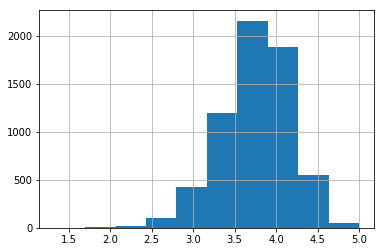

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['stars'].hist(bins = 10)

In [27]:
ratings['stars'].describe()

count    6375.000000
mean        3.756563
std         0.411543
min         1.333333
25%         3.500000
50%         3.800000
75%         4.043983
max         5.000000
Name: stars, dtype: float64

In [28]:
n_ratings = pd.DataFrame(merged.groupby('name_x')['stars'].count())
n_ratings.head()

,stars
name_x,
"""0109 Dessert & Chocolate""",53
"""100 Percent Korean""",23
"""1000 Degrees Neapolitan Pizzeria""",24
"""100th Bomb Group""",24
"""1130 The Restaurant""",58


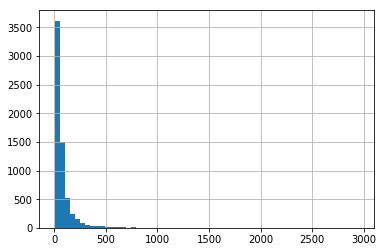

In [29]:
n_ratings['stars'].hist(bins=60)

In [30]:
n_ratings['stars'].describe()

count    6375.000000
mean       82.366275
std       144.286034
min         2.000000
25%        28.000000
50%        45.000000
75%        83.000000
max      2956.000000
Name: stars, dtype: float64

C:\Users\sagar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


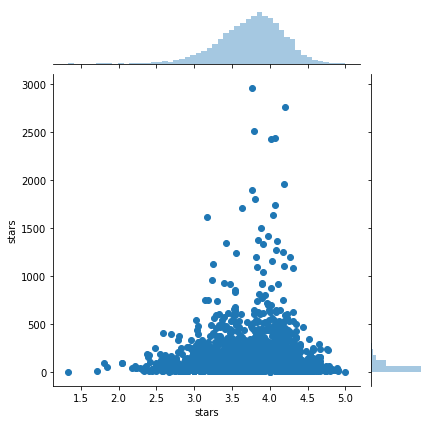

In [31]:
import seaborn as sns
sns.jointplot(x=ratings['stars'], y=n_ratings['stars'], data=ratings)

In [32]:
merged.head()
small_merge = merged[:200000]
small_merge.shape

(200000, 11)

In [33]:
small_merge_pivot = small_merge.pivot_table(index ='user_id', columns = 'business_id', values = 'stars').fillna(0)
small_merge_pivot.shape

(4263, 7743)

In [34]:
small_merge_pivot.head()

business_id,--9e1ONYQuAa-CB_Rrw7Tw,--FBCX-N37CMYDfs790Bnw,--cZ6Hhc9F7VkKXxHMVZSQ,-050d_XIor1NpCuWkbIVaQ,-0tgMGl7D9B10YjSN2ujLA,-1UMR00eXtwaeh59pEiDjA,-1VaIJza42Hjev6ukacCNg,-1xuC540Nycht_iWFeJ-dw,-3oxnPPPU3YoxO9M1I2idg,-3zffZUHoY8bQjGfPSoBKQ,...,zuUWG7OdMv6awFRYhEYT5Q,zuVvDYJkKAbXQTTBauAqJQ,zuwba6QEBIDZT0tJZmNhdQ,zw4Legbcu018p5WcZ74iWA,zw9_mqWBn1QCfZg88w0Exg,zwNC-Ow4eIMan2__bS9-rg,zwNLJ2VglfEvGu7DDZjJ4g,zwmps5SXn30g-f5wqg_r9A,zxSfGIhK3hH3vVz_pS5eaA,zzSYBWuv_fXGtSgsO-6_1g
user_id,,,,,,,,,,,,,,,,,,,,,
--Qh8yKWAvIP4V4K8ZPfHA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--RlSfc-QmcHFGHyX6aVjA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--ty7Z9fEt08E3dS3_qoSA,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-0udWcFQEt2M8kM3xcIofw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2gOxVWcnBr5DclrrsWXCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
cosine_sim = 1-pairwise_distances(small_merge_pivot, metric="cosine")

In [36]:
pd.DataFrame(cosine_sim).head()

,0,1,2,3,4,5,6,7,8,9,...,4253,4254,4255,4256,4257,4258,4259,4260,4261,4262
0,1.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000
1,0.0,1.000000,0.0,0.02826,0.027375,0.0,0.0,0.0,0.168519,0.0,...,0.024453,0.043011,0.000000,0.0,0.015346,0.000000,0.000000,0.0000,0.00000,0.095863
2,0.0,0.000000,1.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.030055,0.0000,0.00000,0.000000
3,0.0,0.028260,0.0,1.00000,0.000000,0.0,0.0,0.0,0.012792,0.0,...,0.000000,0.000000,0.022504,0.0,0.030140,0.041228,0.000000,0.0000,0.00000,0.000000
4,0.0,0.027375,0.0,0.00000,1.000000,0.0,0.0,0.0,0.073572,0.0,...,0.011631,0.054554,0.000000,0.0,0.047444,0.024960,0.000000,0.0625,0.03502,0.059382


In [37]:
def findksimilarusers(user_id, ratings, metric, k):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(ratings)

    distances, indices = model_knn.kneighbors(ratings.iloc[user_id-1, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
    #print ('{0} most similar users for User {1} :'.format(k,user_id))
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == user_id:
            continue;

        #else:
            #print ('{0}: User {1}, with similarity of {2}'.format(i, indices.flatten()[i]+1, similarities.flatten()[i]))
            
    return similarities,indices

In [38]:
similarities,indices = findksimilarusers(10,small_merge_pivot, metric='cosine', k=10)

In [39]:
similarities,indices = findksimilarusers(10,small_merge_pivot, metric='correlation', k=10)

In [40]:
user_ratings = pd.DataFrame(small_merge.groupby('user_id')['stars'].mean())
user_ratings.head()
user_ratings.describe()

,stars
count,4263.000000
mean,3.770795
std,0.474005
min,1.000000
25%,3.505103
50%,3.777778
75%,4.043478
max,5.000000


In [41]:
def predict_userbased(user_id, item_id, ratings, metric, k):
    prediction=0
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) 
    
    mean_rating = ratings.iloc[user_id-1,:].mean() 
    
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == user_id:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_id-1]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    prediction =(mean_rating + (wtd_sum/sum_wt))
    #print( '\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))
    #print('\nMean rating is : {0} and WTD_sum : {1} and sum_wt : {2}'.format(mean_rating,wtd_sum,sum_wt))
    return prediction

In [42]:
predict_userbased(0,746,small_merge_pivot, 'cosine', 10);

In [43]:
predict_userbased(1,1105,small_merge_pivot, 'correlation', 10);

In [44]:
def m_rating(user_id):
    return small_merge_pivot

user_ratings = pd.DataFrame(merged.groupby('name_y')['stars'].mean())

In [45]:
def findksimilaritems(item_id, ratings, metric, k):
    similarities=[]
    indices=[]    
    ratings=ratings.T
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)

    distances, indices = model_knn.kneighbors(ratings.iloc[item_id-1, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
    #print ('{0} most similar items for item {1}:\n'.format(k,item_id))
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == item_id:
            continue;

        #else:
            #print ('{0}: Item {1} :, with similarity of {2}'.format(i,indices.flatten()[i]+1, similarities.flatten()[i]))


    return similarities,indices

In [46]:
similarities,indices=findksimilaritems(1104,small_merge_pivot, 'cosine',10)

In [47]:
def predict_itembased(user_id, item_id, ratings, metric, k):
    prediction= wtd_sum =0
    similarities, indices=findksimilaritems(item_id, ratings, metric, k) #similar users based on correlation coefficients
    sum_wt = np.sum(similarities)-1
    product=1
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == item_id:
            continue;
        else:
            product = ratings.iloc[user_id-1,indices.flatten()[i]] * (similarities[i])
            wtd_sum = wtd_sum + product                              
    prediction = (wtd_sum/sum_wt)
    #print ('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))
    #print('\nPrediction is : {0} and WTD_sum : {1} and sum_wt : {2}'.format(prediction,wtd_sum,sum_wt))

    return prediction

In [48]:
predict_itembased(0,1104,small_merge_pivot,'cosine',20)

0.6256949738598656

In [49]:
small_merge_pivot.shape

(4263, 7743)

In [50]:
def recommendItem(user_id, item_id, ratings, type1):
    if type == 1:
        prediction = predict_itembased(user_id,item_id,small_merge_pivot,'cosine',10)
    else:
        prediction = predict_userbased(user_id,item_id,small_merge_pivot, 'cosine', 10);
    if prediction > 2.5:
        print ('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))
    return prediction
            

In [52]:
for i in range(100)    
    for j in range(7000):
        p = recommendItem(0,j, small_merge_pivot,1)